spaCy is an open-source Python library that parses and "understands" large volumes of text. Separate models are available that cater to specific languages (English, French, German, etc.).

In [1]:
# Install spaCy
!pip install spaCy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Import spaCy and load the language library
import spacy
nlp = spacy.load('en_core_web_sm')

# Create a Doc object
doc = nlp(u'Tesla is looking at buying U.S. startup for $6 million')

# Print each token separately
for token in doc:
    print(token.text, token.pos_, token.dep_) #dep = syntactic dependency

Tesla PROPN nsubj
is AUX aux
looking VERB ROOT
at ADP prep
buying VERB pcomp
U.S. PROPN compound
startup NOUN dobj
for ADP prep
$ SYM quantmod
6 NUM compound
million NUM pobj


# spaCy Objects

we loaded a model and named it `nlp`.
Next we created a Doc object by applying the model to our text, and named it doc.
spaCy also builds a companion Vocab object

`nlp()` function from spaCy which automatically takes raw text and performs a series of operations to tag, parse and describe the text data.

# Pipeline

When we run `nlp`, our text enters a processing pipeline that first breaks down the text and then performs a series of operations to tag, parse and describe the data.

In [3]:
nlp.pipeline

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x7f6d1df74c90>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x7f6d1df74b40>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x7f6d1dc9a550>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x7f6d1dbe0280>),
 ('lemmatizer',
  <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x7f6d1dbea7d0>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x7f6d1dc9abd0>)]

In [4]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

# Tokenization

The first step in processing text is to split up all the component parts (words & punctuation) into "tokens". These tokens are annotated inside the Doc object to contain descriptive information. We'll go into much more detail on tokenization in an upcoming lecture.

In [5]:
doc2 = nlp(u"Tesla isn't   looking into startups anymore.")

for token in doc2:
  print(token.text, token.pos_, token.dep_)

Tesla PROPN nsubj
is AUX aux
n't PART neg
   SPACE dep
looking VERB ROOT
into ADP prep
startups NOUN pobj
anymore ADV advmod
. PUNCT punct


In [6]:
doc2

Tesla isn't   looking into startups anymore.

In [7]:
doc2[0]

Tesla

In [8]:
type(doc2)

spacy.tokens.doc.Doc

# Part-of-Speech Tagging (POS)

The next step after splitting the text up into tokens is to assign parts of speech. In the above example, `Tesla` was recognized to be a proper noun. Here some statistical modeling is required. For example, words that follow "the" are typically nouns.

For a full list of POS Tags visit https://spacy.io/api/annotation#pos-tagging

Spacy provides a bunch of POS tags such as NOUN (noun), PUNCT (punctuation), ADJ(adjective), ADV(adverb), etc.

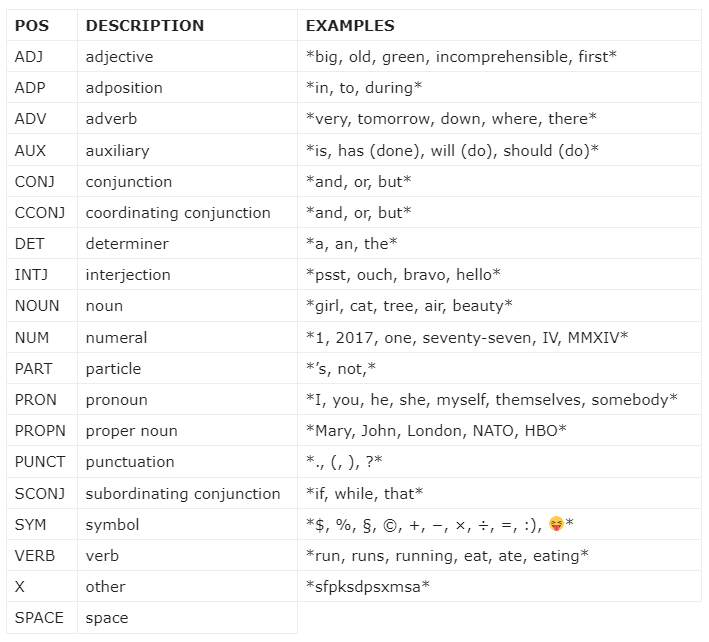

Source: https://machinelearningknowledge.ai/tutorial-on-spacy-part-of-speech-pos-tagging/#:~:text=Spacy%20provides%20a%20bunch%20of,is%20most%20likely%20a%20noun.

In [9]:
doc2[0].pos_

'PROPN'

# Dependencies

We also looked at the syntactic dependencies assigned to each token. `Tesla` is identified as an **nsubj** or the nominal subject of the sentence.

For a full list of Syntactic Dependencies visit https://spacy.io/api/annotation#dependency-parsing

In [10]:
doc2[0].dep_

'nsubj'

To see the full name of a tag use `spacy.explain(tag)`

In [12]:
spacy.explain('PROPN')

'proper noun'

In [13]:
spacy.explain('nsubj')

'nominal subject'

# Additional Token Attributes

|Tag|Description|doc2[0].tag|
|:------|:------:|:------|
|`.text`|The original word text<!-- .element: style="text-align:left;" -->|`Tesla`|
|`.lemma_`|The base form of the word|`tesla`|
|`.pos_`|The simple part-of-speech tag|`PROPN`/`proper noun`|
|`.tag_`|The detailed part-of-speech tag|`NNP`/`noun, proper singular`|
|`.shape_`|The word shape – capitalization, punctuation, digits|`Xxxxx`|
|`.is_alpha`|Is the token an alpha character?|`True`|
|`.is_stop`|Is the token part of a stop list, i.e. the most common words of the language?|`False`|

In [14]:
# Lemmas (the base form of the word):

print(doc2[4].text)
print(doc2[4].lemma_)

looking
look


In [15]:
# Simple Parts-of-Speech & Detailed Tags:
print(doc2[4].pos_)
print(doc2[4].tag_ + ' / ' + spacy.explain(doc2[4].tag_))

VERB
VBG / verb, gerund or present participle


In [16]:
# Word Shapes:
print(doc2[0].text+': '+doc2[0].shape_)
print(doc2[5].text+': '+doc2[5].shape_)

Tesla: Xxxxx
into: xxxx


In [17]:
doc2[2]

n't

In [18]:
# Boolean Values:
print(doc2[0].is_alpha)
print(doc2[0].is_stop)

True
False


# Spans

Large Doc objects can be hard to work with at times. A span is a slice of Doc object in the form `Doc[start:stop]`.

In [19]:
doc3 = nlp(u'Although commmonly attributed to John Lennon from his song "Beautiful Boy", \
the phrase "Life is what happens to us while we are making other plans" was written by \
cartoonist Allen Saunders and published in Reader\'s Digest in 1957, when Lennon was 17.')

In [20]:
life_quote = doc3[16:30]
print(life_quote)

"Life is what happens to us while we are making other plans"


In [21]:
type(life_quote)

spacy.tokens.span.Span

# Sentences

Certain tokens inside a Doc object may also receive a "start of sentence" tag. While this doesn't immediately build a list of sentences, these tags enable the generation of sentence segments through `Doc.sents`.

In [22]:
doc4 = nlp(u'This is the first sentence. This is another sentence. This is the last sentence.')

In [23]:
for sent in doc4.sents:
  print(sent)

This is the first sentence.
This is another sentence.
This is the last sentence.


In [24]:
doc4[6].is_sent_start

True